<a href="https://colab.research.google.com/github/in3xes/CAP5610/blob/master/homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install surprise

     |████████████████████████████████| 11.8MB 6.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670916 sha256=05016ffe491710300414d595d058b1459478aa800c4d522ecadb08b20fcfb98a
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [5]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans
from surprise import Reader

import pandas as pd

df = pd.read_csv('/content/ratings_small.csv')
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# **Question 3.c**

In [11]:
algo = SVD(biased=False)

result_pmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0121  1.0011  1.0040  1.0092  1.0016  1.0056  0.0044  
MAE (testset)     0.7841  0.7731  0.7745  0.7765  0.7737  0.7764  0.0040  
Fit time          4.89    4.85    4.84    4.96    4.85    4.88    0.05    
Test time         0.19    0.12    0.12    0.19    0.19    0.16    0.03    


In [12]:
sim_options_user_msd = {'name': 'MSD', 'user_based': True}

algo_CF_user_msd = KNNWithMeans(sim_options=sim_options_user_msd, verbose=False)

result_CF_user_msd = cross_validate(algo_CF_user_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9193  0.9256  0.9133  0.9260  0.9151  0.9199  0.0052  
MAE (testset)     0.7031  0.7085  0.7022  0.7092  0.6989  0.7044  0.0039  
Fit time          0.15    0.18    0.20    0.20    0.19    0.19    0.02    
Test time         1.94    1.78    1.90    1.94    1.80    1.87    0.07    


In [13]:
sim_options_item_msd = {'name': 'MSD', 'user_based': False}

algo_CF_item_msd = KNNWithMeans(sim_options=sim_options_item_msd, verbose=False)

result_CF_item_msd = cross_validate(algo_CF_item_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9140  0.9169  0.9232  0.9163  0.9118  0.9164  0.0038  
MAE (testset)     0.6998  0.7022  0.7072  0.7034  0.6981  0.7021  0.0031  
Fit time          5.04    4.64    4.10    4.07    4.44    4.46    0.36    
Test time         6.99    7.36    7.33    7.11    7.31    7.22    0.15    


# **Question 3.d**

[0.01987422699432817, 0.016429514528135125, 0.10559651016552085]


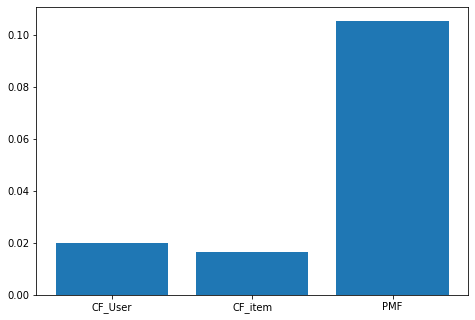

In [34]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)


perf_mean = [get_perf(result_CF_user_msd['test_rmse']), get_perf(result_CF_item_msd['test_rmse']), get_perf(result_pmf['test_rmse'])]

print(perf_mean)

algos = ['CF_User', 'CF_item', 'PMF']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.10437050720124086, 0.10212805017902704, 0.1763748940230654]


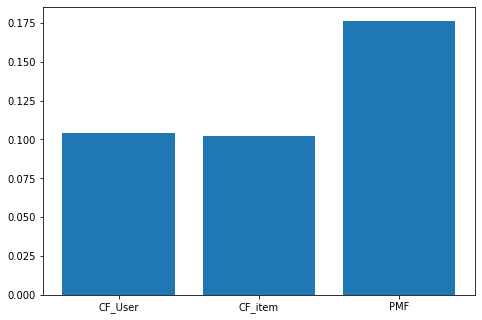

In [35]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.6)


perf_mean = [get_perf(result_CF_user_msd['test_mae']), get_perf(result_CF_item_msd['test_mae']), get_perf(result_pmf['test_mae'])]

print(perf_mean)

algos = ['CF_User', 'CF_item', 'PMF']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

# **Question 3.e**

In [16]:
sim_options_user = {'name': 'cosine', 'user_based': True}

algo_CF_user = KNNWithMeans(sim_options=sim_options_user, verbose=False)

result_CF_user_cosine = cross_validate(algo_CF_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9210  0.9230  0.9214  0.9259  0.9248  0.9232  0.0019  
MAE (testset)     0.7017  0.7072  0.7073  0.7107  0.7093  0.7072  0.0030  
Fit time          0.40    0.42    0.41    0.41    0.41    0.41    0.01    
Test time         1.90    1.77    1.77    1.86    1.77    1.81    0.06    


In [17]:
sim_options_item = {'name': 'cosine', 'user_based': False}

algo_CF_item = KNNWithMeans(sim_options=sim_options_item, verbose=False)

result_CF_item_cosine = cross_validate(algo_CF_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9251  0.9189  0.9309  0.9254  0.9364  0.9273  0.0059  
MAE (testset)     0.7092  0.7026  0.7127  0.7110  0.7157  0.7103  0.0044  
Fit time          13.75   13.82   13.39   13.64   13.44   13.61   0.17    
Test time         6.84    7.11    7.06    6.97    7.09    7.01    0.10    


In [18]:
sim_options_user_pearson = {'name': 'pearson_baseline', 'user_based': True}

algo_CF_user_pearson = KNNWithMeans(sim_options=sim_options_user_pearson, verbose=False)

result_CF_user_pearson = cross_validate(algo_CF_user_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9325  0.9188  0.9227  0.9256  0.9160  0.9231  0.0057  
MAE (testset)     0.7092  0.7018  0.6995  0.7023  0.6939  0.7013  0.0049  
Fit time          0.70    0.71    0.71    0.72    0.71    0.71    0.01    
Test time         1.66    1.81    1.65    1.80    1.65    1.72    0.07    


In [19]:
sim_options_item_pearson = {'name': 'pearson_baseline', 'user_based': False}

algo_CF_item_pearson = KNNWithMeans(sim_options=sim_options_item_pearson, verbose=False)

result_CF_item_pearson = cross_validate(algo_CF_item_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8985  0.9097  0.9065  0.9077  0.8990  0.9043  0.0046  
MAE (testset)     0.6838  0.6916  0.6913  0.6895  0.6827  0.6878  0.0038  
Fit time          8.62    8.53    8.55    8.55    8.56    8.56    0.03    
Test time         6.78    6.85    6.71    6.94    6.86    6.83    0.08    


[0.01987422699432817, 0.023192141302636138, 0.023128720767045752]


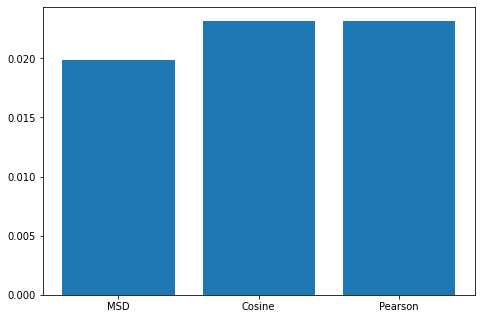

In [36]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)


perf_mean = [get_perf(result_CF_user_msd['test_rmse']), get_perf(result_CF_user_cosine['test_rmse']), get_perf(result_CF_user_pearson['test_rmse'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.016429514528135125, 0.02733432444049133, 0.004252545046199652]


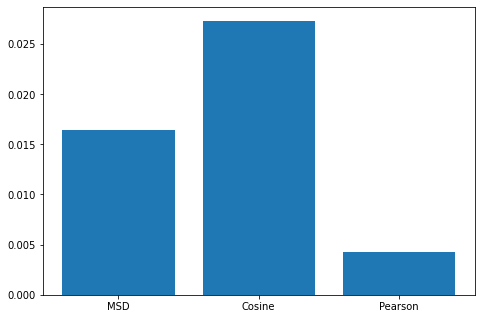

In [37]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)


perf_mean = [get_perf(result_CF_item_msd['test_rmse']), get_perf(result_CF_item_cosine['test_rmse']), get_perf(result_CF_item_pearson['test_rmse'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.10437050720124086, 0.10723598096511311, 0.10134900318070672]


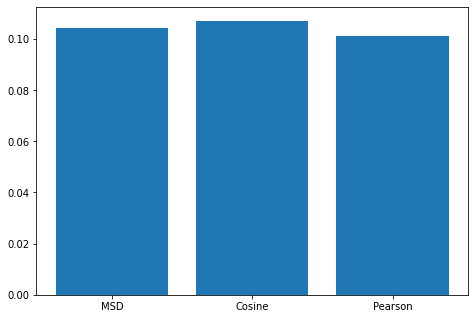

In [38]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.6)


perf_mean = [get_perf(result_CF_user_msd['test_mae']), get_perf(result_CF_user_cosine['test_mae']), get_perf(result_CF_user_pearson['test_mae'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.10212805017902704, 0.11025467370092623, 0.08777960927007467]


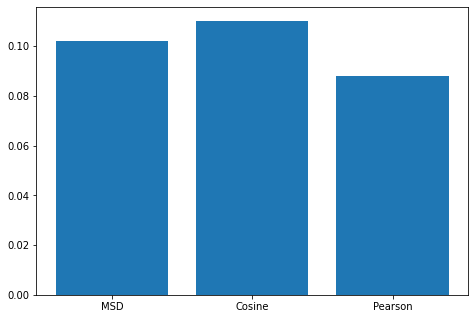

In [39]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.6)


perf_mean = [get_perf(result_CF_item_msd['test_mae']), get_perf(result_CF_item_cosine['test_mae']), get_perf(result_CF_item_pearson['test_mae'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

# **Question 3.f**

K :  5
RMSE: 0.9600
K :  10
RMSE: 0.9353
K :  15
RMSE: 0.9282
K :  20
RMSE: 0.9252
K :  25
RMSE: 0.9241
K :  30
RMSE: 0.9233
K :  35
RMSE: 0.9231
K :  40
RMSE: 0.9228
K :  45
RMSE: 0.9227
K :  50
RMSE: 0.9227
K :  55
RMSE: 0.9228
K :  60
RMSE: 0.9230
K :  65
RMSE: 0.9231
K :  70
RMSE: 0.9232
K :  75
RMSE: 0.9233
K :  80
RMSE: 0.9234
K :  85
RMSE: 0.9235
K :  90
RMSE: 0.9236
K :  95
RMSE: 0.9236
K :  100
RMSE: 0.9237
K :  105
RMSE: 0.9237
K :  110
RMSE: 0.9237
K :  115
RMSE: 0.9238
K :  120
RMSE: 0.9238
K :  125
RMSE: 0.9239
K :  130
RMSE: 0.9239
K :  135
RMSE: 0.9239
K :  140
RMSE: 0.9240
K :  145
RMSE: 0.9240
K :  150
RMSE: 0.9240
K :  155
RMSE: 0.9241
K :  160
RMSE: 0.9241
K :  165
RMSE: 0.9241
K :  170
RMSE: 0.9241
K :  175
RMSE: 0.9241
K :  180
RMSE: 0.9241
K :  185
RMSE: 0.9241
K :  190
RMSE: 0.9241
K :  195
RMSE: 0.9241
K :  200
RMSE: 0.9241


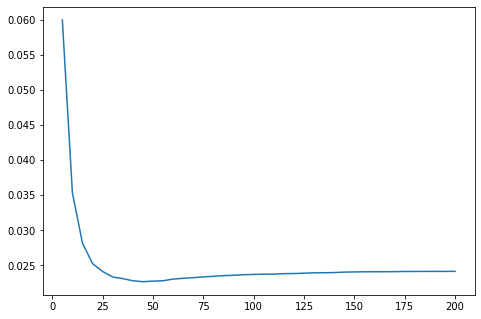

In [45]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_user = []
k = [x*5 for x in range(1, 41)]

for input_k in k:
  print("K : ", input_k)
  algo = KNNWithMeans(k=input_k, sim_options=sim_options_user_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_user.append((accuracy.rmse(predictions)-0.9))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k,results_k_user)
plt.show()

K :  5
RMSE: 0.9801
K :  10
RMSE: 0.9466
K :  15
RMSE: 0.9345
K :  20
RMSE: 0.9283
K :  25
RMSE: 0.9249
K :  30
RMSE: 0.9223
K :  35
RMSE: 0.9206
K :  40
RMSE: 0.9193
K :  45
RMSE: 0.9186
K :  50
RMSE: 0.9181
K :  55
RMSE: 0.9174
K :  60
RMSE: 0.9166
K :  65
RMSE: 0.9164
K :  70
RMSE: 0.9161
K :  75
RMSE: 0.9160
K :  80
RMSE: 0.9158
K :  85
RMSE: 0.9155
K :  90
RMSE: 0.9155
K :  95
RMSE: 0.9154
K :  100
RMSE: 0.9153
K :  105
RMSE: 0.9152
K :  110
RMSE: 0.9152
K :  115
RMSE: 0.9151
K :  120
RMSE: 0.9151
K :  125
RMSE: 0.9149
K :  130
RMSE: 0.9150
K :  135
RMSE: 0.9150
K :  140
RMSE: 0.9150
K :  145
RMSE: 0.9149
K :  150
RMSE: 0.9149
K :  155
RMSE: 0.9150
K :  160
RMSE: 0.9150
K :  165
RMSE: 0.9150
K :  170
RMSE: 0.9150
K :  175
RMSE: 0.9150
K :  180
RMSE: 0.9150
K :  185
RMSE: 0.9150
K :  190
RMSE: 0.9150
K :  195
RMSE: 0.9150
K :  200
RMSE: 0.9150


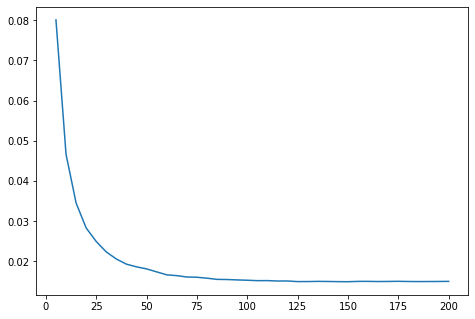

In [46]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_item = []
k = [x*5 for x in range(1, 41)]

for input_k in k:
  print("K : ", input_k)

  algo = KNNWithMeans(k=input_k, sim_options=sim_options_item_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_item.append((accuracy.rmse(predictions)-0.9))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k, results_k_item)
plt.show()

K :  5
MAE:  0.7396
K :  10
MAE:  0.7193
K :  15
MAE:  0.7124
K :  20
MAE:  0.7096
K :  25
MAE:  0.7082
K :  30
MAE:  0.7075
K :  35
MAE:  0.7073
K :  40
MAE:  0.7071
K :  45
MAE:  0.7071
K :  50
MAE:  0.7071
K :  55
MAE:  0.7071
K :  60
MAE:  0.7071
K :  65
MAE:  0.7071
K :  70
MAE:  0.7072
K :  75
MAE:  0.7073
K :  80
MAE:  0.7073
K :  85
MAE:  0.7074
K :  90
MAE:  0.7074
K :  95
MAE:  0.7074
K :  100
MAE:  0.7075
K :  105
MAE:  0.7076
K :  110
MAE:  0.7076
K :  115
MAE:  0.7077
K :  120
MAE:  0.7078
K :  125
MAE:  0.7078
K :  130
MAE:  0.7078
K :  135
MAE:  0.7079
K :  140
MAE:  0.7079
K :  145
MAE:  0.7079
K :  150
MAE:  0.7080
K :  155
MAE:  0.7080
K :  160
MAE:  0.7080
K :  165
MAE:  0.7080
K :  170
MAE:  0.7080
K :  175
MAE:  0.7080
K :  180
MAE:  0.7080
K :  185
MAE:  0.7081
K :  190
MAE:  0.7081
K :  195
MAE:  0.7081
K :  200
MAE:  0.7081


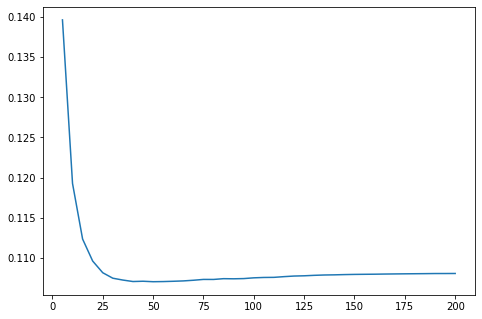

In [47]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_user = []
k = [x*5 for x in range(1, 41)]

for input_k in k:
  print("K : ", input_k)
  algo = KNNWithMeans(k=input_k, sim_options=sim_options_user_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_user.append((accuracy.mae(predictions)-0.6))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k,results_k_user)
plt.show()

K :  5
MAE:  0.7499
K :  10
MAE:  0.7234
K :  15
MAE:  0.7149
K :  20
MAE:  0.7098
K :  25
MAE:  0.7057
K :  30
MAE:  0.7030
K :  35
MAE:  0.7016
K :  40
MAE:  0.7006
K :  45
MAE:  0.6998
K :  50
MAE:  0.6993
K :  55
MAE:  0.6989
K :  60
MAE:  0.6986
K :  65
MAE:  0.6983
K :  70
MAE:  0.6981
K :  75
MAE:  0.6980
K :  80
MAE:  0.6979
K :  85
MAE:  0.6976
K :  90
MAE:  0.6974
K :  95
MAE:  0.6972
K :  100
MAE:  0.6972
K :  105
MAE:  0.6971
K :  110
MAE:  0.6971
K :  115
MAE:  0.6969
K :  120
MAE:  0.6968
K :  125
MAE:  0.6968
K :  130
MAE:  0.6969
K :  135
MAE:  0.6968
K :  140
MAE:  0.6968
K :  145
MAE:  0.6968
K :  150
MAE:  0.6967
K :  155
MAE:  0.6967
K :  160
MAE:  0.6967
K :  165
MAE:  0.6967
K :  170
MAE:  0.6967
K :  175
MAE:  0.6967
K :  180
MAE:  0.6967
K :  185
MAE:  0.6967
K :  190
MAE:  0.6966
K :  195
MAE:  0.6966
K :  200
MAE:  0.6966


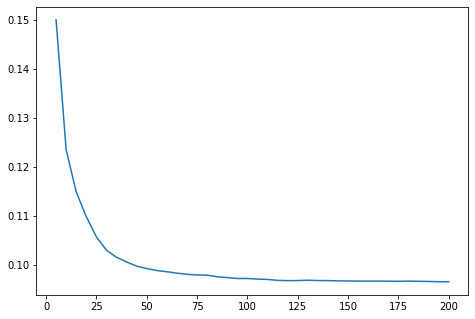

In [48]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_item = []
k = [x*5 for x in range(1, 41)]

for input_k in k:
  print("K : ", input_k)

  algo = KNNWithMeans(k=input_k, sim_options=sim_options_item_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_item.append((accuracy.mae(predictions)-0.6))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k, results_k_item)
plt.show()

# **Question 3.g**

In [6]:
from surprise.model_selection import GridSearchCV

k = [x*5 for x in range(1, 41)]

param_grid_user = {'k': k,
              'sim_options': {'user_based': [True]},
              'verbose' : [False]
              }

gs_user = GridSearchCV(KNNWithMeans, param_grid_user, measures=['rmse'], cv=3)

gs_user.fit(data)

print(gs_user.best_score['rmse'])
print(gs_user.best_params['rmse'])

0.9266787894407263
{'k': 45, 'sim_options': {'user_based': True}, 'verbose': False}


In [8]:
from surprise.model_selection import GridSearchCV

k = [x*5 for x in range(1, 41)]
param_grid_item = {'k': k,
              'sim_options': {'user_based': [False]},
              'verbose' : [False]
              }

gs_item = GridSearchCV(KNNWithMeans, param_grid_item, measures=['rmse'], cv=3)

gs_item.fit(data)

print(gs_item.best_score['rmse'])
print(gs_item.best_params['rmse'])

0.9171881759045944
{'k': 140, 'sim_options': {'user_based': False}, 'verbose': False}
